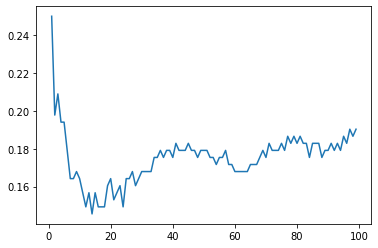

Точность метода kNN: 0.8432835820895522


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/DataTitanic.csv', index_col = 0) # Загружаем данные и говорим, что в качестве меток строки будут выступать значения нулевого столбца


data['Age'] = data['Age'].fillna(data['Age'].mean())   # Заменим пропущенные значения в столбце Age средним значением
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())   # Заменим пропущенные значения в столбце Fare средним значением

# Категоризируем столбцы и переводим строковые категории в числовые
data['Sex'] = data['Sex'].astype('category')
data['Sex']  = data['Sex'].cat.codes

data['Embarked'] = data['Embarked'].astype('category')
data['Embarked']  = data['Embarked'].cat.codes

data_used = data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)  # axis = 1 означает, что происходит удаление столбцов. Если axis = 0, то удаляются строки

# Стандартизируем набор данных
scaler = StandardScaler()
scaler.fit( data_used.drop( 'Survived', axis = 1)  )
data_trfm_np = scaler.transform(data_used.drop('Survived', axis = 1))
data_trfm = pd.DataFrame(data_trfm_np, columns = data_used.drop('Survived', axis = 1).columns)

# Заполняем 
x_data = data_trfm
y_data = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)


y_error = []
x_error = []
save_values = {}

for k in range(1, 100): # Задаём в цикле различное значение количества соседий, от которых в итоге будет зависеть решение
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  save_values[k] = predictions
  y_error.append( np.mean(predictions != y_test)  )
  x_error.append( k )

plt.plot(x_error, y_error)
plt.show()

min_error = np.min(y_error)
min_error_index = np.argpartition(y_error, 0)[0]
data_knn = save_values[min_error_index]
accuracy_knn = accuracy_score(y_test, data_knn)
print('Точность метода kNN:', accuracy_knn )

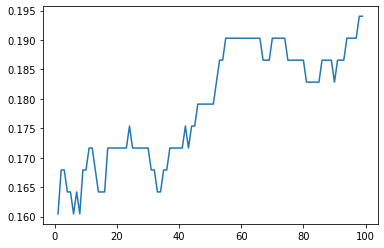

Точность метода SVM: 0.8395522388059702


In [ ]:
from sklearn.svm import SVC

error_svc = {}
x_error_svc = []
save_values_svc = {}

# Параметр регуляризации (C) – мера степени наказания модели за каждую неверно классифицированную точку.
# Ядра – функции преобразования могут так трансформировать набор точек, что разделяющая гиперплоскость будет найдена.
# C - контролирует, насколько мы хотим наказать модель за каждую неверно классифицированную точку. 
# Большое значение C приводит к тому, что из всех возможных гиперплоскостей будет иметь приоритет тот, что совершил наименьшее количество классификационных ошибок.
# Низкое значение C, наоборот, выберет такую разделительную границу, что хорошо разделяет точки, допуская некоторую погрешность.

for c in range(1, 100): # В цикле будем задавать различное значение регулятивной переменной С
  model_svc = SVC(kernel='rbf', C = c) # Задаём Гауссово ядро
  model_svc.fit(x_train, y_train)
  predictions_svc = model_svc.predict(x_test)
  save_values_svc[c] = predictions_svc
  error_svc[c] = np.mean(predictions_svc != y_test)
  x_error_svc.append( c )

plt.plot( [*error_svc.keys()],[*error_svc.values()])
plt.show()

def search_min(array):
  min_value = 1
  min_c = np.NaN
  for key in array.keys():
    if min_value > array[key]:
      min_value = array[key]
      min_c = key
  return min_c

min = search_min(error_svc)
data_svm = save_values_svc[min]
accuracy_svc = accuracy_score(y_test, data_svm)
print('Точность метода SVM:', accuracy_svc )

In [ ]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=2)

model_kmeans.fit(x_train)
predictions_kmeans = model_kmeans.predict(x_test)

def replace(array): # Функция для замены значений бинарного массива на противоположные
  new_array = []
  for value in array:
    if value == 1:
      new_array.append(0)
    else:
      new_array.append(1)
  #print(new_array)
  return new_array

def check(array_test, array_pred): # Функция проверки соответствия идентичности принадлежности меток классов
  array_test = np.array(array_test)
  array_pred = np.array(array_pred)
  count = 0
  len_count = []
  for i in range(0, len(array_test)-1):
    if array_test[i] == array_pred[i]:
      count = count+1
    else:
      len_count.append(count)
      count = 0
  if np.max(len_count) <= 7:
    return replace(array_pred)
  else:
    return array_pred

data_kmeans = check(y_test, predictions_kmeans)

accuracy_kmeans = accuracy_score(np.array(y_test) , data_kmeans )
print('Точность метода k-Means:', accuracy_kmeans)

Точность метода k-Means: 0.7164179104477612


In [ ]:
#data_knn
#data_svm 
#data_kmeans

def ansambly(array1, array2, array3):
  count0 = 0
  count1 = 0
  real_array = []
  for i in range(0, len(array1)):
    if array1[i] == 0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1

    if array2[i] == 0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1

    if array3[i] == 0:
      count0 = count0 + 1
    else:
      count1 = count1 + 1

    if count1 > count0:
        real_array.append(1)
    else:
        real_array.append(0)     

    count0 = 0
    count1 = 0
  return real_array


ans = ansambly(data_knn, data_svm , data_kmeans)

accuracy_ansambly = accuracy_score(y_test , ans )
print('Точность ансамбля трёх методов:', accuracy_ansambly)

general = pd.DataFrame({ 'kNN' : data_knn , 'SVM' : data_svm , 'k-Means' : data_kmeans, 'Ansambly' : ans, 'original' : y_test })
general.to_csv('general.csv', sep=',')
general.head()

Точность ансамбля трёх методов: 0.8470149253731343


,kNN,SVM,k-Means,Ansambly,original
PassengerId,,,,,
773,1,1,1,1,0
831,1,1,0,1,1
67,1,1,0,1,1
93,0,0,1,0,0
751,1,1,0,1,1


In [ ]:
print(classification_report(y_test, data_knn))
print(classification_report(y_test, data_svm))
print(classification_report(y_test, data_kmeans))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       164
           1       0.78      0.73      0.76       104

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       164
           1       0.40      0.37      0.38       104

    accuracy                           0.54       268
   macro avg       0.51      0.51      0.51       268
weighted avg       0.54      0.54      0.54       268

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       164
           1       0.38      0.27      0.31       104

    accuracy                           0.54       268
   macro avg       0.49      0.49      0.49       268
weighted avg       0.52      0.54      0.53       268

